#Part A: Linear SVM

##Generate Data

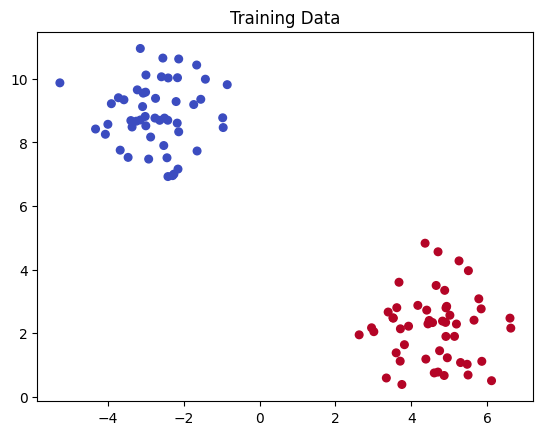

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Generate dataset
X, y = make_blobs(n_samples=100, centers=2, random_state=42, cluster_std=1.05)
y = np.where(y == 0, -1, 1)  # Change labels from 0, 1 to -1, 1

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Plot the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap='coolwarm')
plt.title("Training Data")
plt.show()


##Implement Linear SVM Class

In [ ]:
class LinearSVM:
    def __init__(self, learning_rate=0.01, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        # Initialize weights and bias
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                if y[idx] * (np.dot(x_i, self.w) - self.b) >= 1:
                    # Correctly classified
                    dw = 2 * self.lambda_param * self.w
                    db = 0
                else:
                    # Misclassified
                    dw = 2 * self.lambda_param * self.w - np.dot(x_i, y[idx])
                    db = y[idx]

                self.w -= self.lr * dw
                self.b -= self.lr * db

    def predict(self, X):
        linear_output = np.dot(X, self.w) - self.b
        return np.sign(linear_output)


##Fit the SVM Model

In [ ]:
# Create and fit the model
model = LinearSVM()
model.fit(X_train, y_train)


##Draw the Decision Boundary

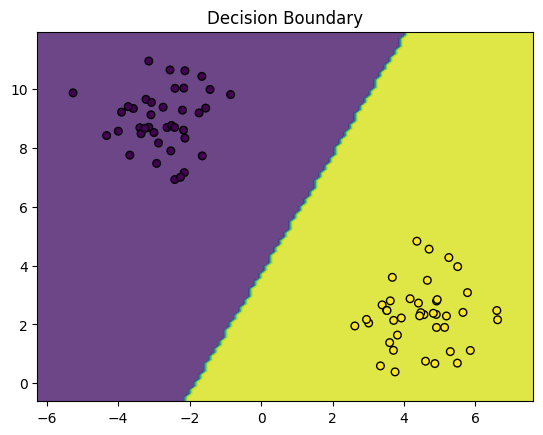

In [ ]:
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolors='k')
    plt.title("Decision Boundary")
    plt.show()

plot_decision_boundary(X_train, y_train, model)


##Calculate Accuracy on Test Set

In [ ]:
# Test accuracy
y_pred = model.predict(X_test)
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 100.00%


##Predict the Class of a Random Data Point

In [ ]:
random_point = np.array([[2, 3]])  # Example random point
prediction = model.predict(random_point)
print(f"Predicted class for random point {random_point}: {prediction}")


Predicted class for random point [[2 3]]: [1.]
